# **CSCI E-89b: Introduction to Natural Language Processing**
## **Emotion Recognition and Classification Using Advanced Transformer Models**

### **Project Details**
- **Course**: CSCI E-89b: Introduction to Natural Language Processing
- **Semester**: Fall 2024
- **Submission Date**: December 16th, 2024

### **Student Information**
- **Name**: Mohamed Yehia Mokhtar Salama
- **Harvard ID**: 81702055
- **DCE ID**: @00930604

### **Project Overview**
The GoEmotions project explores advanced emotion recognition techniques using state-of-the-art transformer models, specifically RoBERTa, to classify human emotions in textual data across multiple emotion categories.

### **Project Objectives**
1. Develop a multi-label emotion classification model
2. Implement advanced feature extraction using transformer architectures
3. Optimize classification thresholds for improved performance
4. Analyze model performance across different emotion categories

### **Technical Stack**
- **Programming Language**: Python 3.9+
- **Machine Learning Frameworks**:
  - TensorFlow
  - Transformers (Hugging Face)
  - Scikit-learn
- **NLP Libraries**:
  - NLTK
  - Tokenizers
- **Data Manipulation**:
  - Pandas
  - NumPy
- **Visualization**:
  - Matplotlib
  - Seaborn

### **Model Specifications**
- **Base Model**: RoBERTa
- **Classification Type**: Multi-label
- **Input**: Text sequences
- **Output**: Emotion probabilities

### **Performance Metrics**
- Precision
- Recall
- F1-Score
- Confusion Matrix
- Precision-Recall Curves

### **Acknowledgements**
Special thanks to:
- Harvard DCE Online Learning
- Professor Dr. Dmitry Kurochkin
- GoEmotions Dataset Creators

## **1. Import Libraries and Initialize NLP Components**

### **1.1. Overview**

This section establishes the computational environment for emotion recognition by systematically importing essential libraries and initializing natural language processing components required for text analysis and machine learning tasks.

In [35]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from transformers import RobertaTokenizer, TFRobertaModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import contractions
import warnings
from sklearn.metrics import f1_score, precision_recall_curve

warnings.filterwarnings('ignore')

# Downloading required NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## **2. Data Loading and Initial Exploration**

### **2.1. Overview**
This section handles the loading of various datasets and emotion mappings required for the emotion recognition task. It includes loading the train, validation, and test datasets, along with emotion mappings and categories. The section also provides initial data exploration to understand the structure and size of the datasets.

### **2.2. Data Components**

#### **2.2.1. Main Datasets**
- **Training Data**: Main dataset for model training
- **Validation Data**: Dataset for model validation during training
- **Test Data**: Dataset for final model evaluation

#### **2.2.2. Emotion Mappings**
- **Ekman Mapping**: JSON file containing emotion categories mapping
- **Emotion List**: Text file containing all possible emotions

In [36]:
# Loading datasets
train_data = pd.read_csv("/content/train.tsv", sep='\t', names=['text', 'emotions', 'id'])
valid_data = pd.read_csv("/content/dev.tsv", sep='\t', names=['text', 'emotions', 'id'])
test_data = pd.read_csv("/content/test.tsv", sep='\t', names=['text', 'emotions', 'id'])

# Loading emotion mappings
with open('/content/ekman_mapping.json', 'r') as f:
    ekman_mapping = json.load(f)

# Load emotion list
with open('/content/emotions.txt', 'r') as f:
    emotion_list = f.read().splitlines()

# Displaying basic information about the datasets
print("Train samples:", len(train_data))
print("Validation samples:", len(valid_data))
print("Test samples:", len(test_data))
print("\nEkman categories:", list(ekman_mapping.keys()))
print("\nTotal emotions:", len(emotion_list))

print("\nSample of training data:")
train_data.head()

Train samples: 43410
Validation samples: 5426
Test samples: 5427

Ekman categories: ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']

Total emotions: 28

Sample of training data:


,text,emotions,id
0,My favourite food is anything I didn't have to...,27,eebbqej
1,"Now if he does off himself, everyone will thin...",27,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
3,To make her feel threatened,14,ed7ypvh
4,Dirty Southern Wankers,3,ed0bdzj


## **3. Text Preprocessing Pipeline**

### **3.1. Overview**
This section implements a comprehensive text preprocessing pipeline for cleaning and standardizing the text data. The preprocessing steps are essential for improving the quality of input data for the emotion recognition model.

### **3.2. Preprocessing Components**

#### **3.2.1. Text Normalization**
- Conversion to lowercase
- String type standardization
- Contraction expansion (e.g., "don't" → "do not")
- Special character removal

#### **3.2.2. Stop Word Processing**
- Removal of common English stop words
- Preservation of important negative words:
  - "not"
  - "no"
  - "nor"
  - "neither"

### **3.3. Process Flow**
1. Text normalization and cleaning
2. Stop word list customization
3. Tokenization and lemmatization
4. Token filtering
5. Processed text reconstruction

### **3.4. Output**
- New column 'processed_text' added to each dataset
- Preprocessed text maintains semantic meaning while:
  - Removing noise
  - Standardizing format
  - Reducing vocabulary complexity

In [37]:
def preprocess_text(text):
    """
    Apply full preprocessing pipeline to input text
    """
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Keeping important negative words
    negative_words = {'not', 'no', 'nor', 'neither'}
    stop_words = stop_words - negative_words

    text = str(text).lower()  # Converting to lowercase and ensure string type
    text = contractions.fix(text)  # Fixing contractions
    text = re.sub(r'[^\w\s]', '', text)  # Removeing special characters

    # Tokenizing and lemmatizeing
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens
             if token not in stop_words]

    return ' '.join(tokens)

# Applying preprocessing to all datasets
print("Preprocessing training data...")
train_data['processed_text'] = train_data['text'].apply(preprocess_text)
print("Preprocessing validation data...")
valid_data['processed_text'] = valid_data['text'].apply(preprocess_text)
print("Preprocessing test data...")
test_data['processed_text'] = test_data['text'].apply(preprocess_text)

# Displaying sample of preprocessed text
print("\nSample of preprocessed text:")
pd.DataFrame({
    'Original': train_data['text'][:5],
    'Preprocessed': train_data['processed_text'][:5]
})

Preprocessing training data...
Preprocessing validation data...
Preprocessing test data...

Sample of preprocessed text:


,Original,Preprocessed
0,My favourite food is anything I didn't have to...,favourite food anything not cook
1,"Now if he does off himself, everyone will thin...",everyone think he laugh screwing people instea...
2,WHY THE FUCK IS BAYLESS ISOING,fuck bayless isoing
3,To make her feel threatened,make feel threatened
4,Dirty Southern Wankers,dirty southern wanker


## **4. Label Encoding and Transformation**

### **4.1. Overview**
This section implements the conversion of emotion labels from the GoEmotions format to Ekman categories and their subsequent one-hot encoding. The process involves mapping detailed emotion labels to broader Ekman categories and creating binary vectors for model training. This transformation is crucial for standardizing the emotion classification process and enabling efficient model training.

### **4.2. Label Processing Components**

#### **4.2.1. Ekman Category Conversion**
The first component of the label processing pipeline handles the conversion of raw emotion indices to Ekman categories. The process begins by parsing the emotion indices from their string format and converting them to their corresponding emotion labels. These labels are then mapped to their respective Ekman categories according to the predefined mapping structure. Special consideration is given to the neutral emotion category, which is preserved as a separate class. The process also includes the removal of duplicate categories that may arise from multiple emotions mapping to the same Ekman category.

#### **4.2.2. One-Hot Encoding**
The second component transforms the Ekman categories into one-hot encoded vectors suitable for machine learning. This process creates a binary vector representation where each position corresponds to a specific Ekman category. For each emotion instance, the appropriate positions in the vector are set to 1, while all others remain 0. This approach effectively handles cases where multiple emotions are present in a single sample.

In [38]:
def convert_to_ekman(emotions, emotion_list, ekman_mapping):
    """
    Convert GoEmotions labels to Ekman categories
    """
    # Converting emotion indices to labels
    emotion_indices = [int(idx) for idx in emotions.split(',')]
    emotion_labels = [emotion_list[idx] for idx in emotion_indices]

    # Mapping to Ekman emotions
    ekman_emotions = []
    for emotion in emotion_labels:
        for ekman_category, category_emotions in ekman_mapping.items():
            if emotion in category_emotions:
                ekman_emotions.append(ekman_category)
            elif emotion == 'neutral':
                ekman_emotions.append('neutral')

    return list(set(ekman_emotions))  # Removing duplicates

def convert_to_one_hot(ekman_emotions, all_categories):
    """
    Convert Ekman emotions to one-hot encoded array
    """
    one_hot = np.zeros(len(all_categories))
    for emotion in ekman_emotions:
        if emotion in all_categories:
            idx = all_categories.index(emotion)
            one_hot[idx] = 1
    return one_hot

# Getting all possible categories
ekman_categories = list(ekman_mapping.keys()) + ['neutral']

# Converting labels for all datasets
print("Converting labels to Ekman categories...")
train_ekman = train_data['emotions'].apply(lambda x: convert_to_ekman(x, emotion_list, ekman_mapping))
valid_ekman = valid_data['emotions'].apply(lambda x: convert_to_ekman(x, emotion_list, ekman_mapping))
test_ekman = test_data['emotions'].apply(lambda x: convert_to_ekman(x, emotion_list, ekman_mapping))

# Converting to one-hot encoding
train_labels = np.array([convert_to_one_hot(e, ekman_categories) for e in train_ekman])
valid_labels = np.array([convert_to_one_hot(e, ekman_categories) for e in valid_ekman])
test_labels = np.array([convert_to_one_hot(e, ekman_categories) for e in test_ekman])

# Displaying sample of converted labels
print("\nSample of converted labels:")
pd.DataFrame({
    'Original': train_data['emotions'][:5],
    'Ekman Categories': train_ekman[:5],
    'One-hot Encoded': [list(l) for l in train_labels[:5]]
})

Converting labels to Ekman categories...

Sample of converted labels:


,Original,Ekman Categories,One-hot Encoded
0,27,[neutral],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
1,27,[neutral],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
2,2,[anger],"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,14,[fear],"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
4,3,[anger],"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


## **5. Text Encoding for RoBERTa Model**

### **5.1. Overview**
This section focuses on the preparation of text data for input into the RoBERTa model. The process involves converting preprocessed text into a format that the model can understand through tokenization and encoding. This transformation is essential for leveraging the power of the pre-trained RoBERTa model for emotion recognition tasks.

### **5.2. Tokenization Process**
The tokenization process utilizes the RoBERTa tokenizer, which has been specifically designed for the RoBERTa model architecture. This tokenizer breaks down text into subword units, allowing for effective handling of both common and rare words. The process maintains the semantic relationships between words while creating a standardized input format that the model can process efficiently.

### **5.3. Encoding Configuration**
The encoding process is configured with specific parameters to ensure consistent and optimal input formatting. A maximum sequence length of 128 tokens is established to balance between preserving text information and computational efficiency. The process includes truncation for longer sequences and padding for shorter ones, ensuring uniform input dimensions across all samples. The tensors are formatted specifically for TensorFlow, aligning with our model's framework.

In [39]:
def prepare_for_bert(texts, max_length=128):
    """
    Tokenize and encode texts for BERT input
    """
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

    encodings = tokenizer(
        texts.tolist(),
        truncation=True,
        padding='max_length',
        max_length=max_length,
        return_tensors='tf'
    )

    return encodings

# Prepare inputs for all datasets
print("Preparing model inputs...")
train_encodings = prepare_for_bert(train_data['processed_text'])
valid_encodings = prepare_for_bert(valid_data['processed_text'])
test_encodings = prepare_for_bert(test_data['processed_text'])

# Display shapes of prepared data
print("\nShape of prepared data:")
print("Train encodings:", train_encodings['input_ids'].shape)
print("Validation encodings:", valid_encodings['input_ids'].shape)
print("Test encodings:", test_encodings['input_ids'].shape)

Preparing model inputs...

Shape of prepared data:
Train encodings: (43410, 128)
Validation encodings: (5426, 128)
Test encodings: (5427, 128)


## **6. Model Architecture and Training**

### **6.1. Overview**
This section describes the implementation of a custom emotion recognition model based on the RoBERTa architecture. The model combines the power of pre-trained language understanding with task-specific layers for emotion classification. The implementation includes model definition, compilation, and training procedures optimized for multi-label emotion classification.

### **6.2. Model Architecture**
The emotion recognition model follows a hierarchical structure, building upon the RoBERTa base model. At its core, it utilizes the pre-trained RoBERTa model for feature extraction, followed by a series of custom layers for emotion classification. The architecture employs dropout layers for regularization, a dense hidden layer for feature transformation, and a final classification layer with sigmoid activation for multi-label prediction capabilities.

### **6.3. Layer Configuration**
The model's layer configuration begins with the RoBERTa base model, which processes the input text through its transformer architecture. This is followed by strategic dropout layers (rate: 0.1) to prevent overfitting, and a dense layer with 512 units and ReLU activation for non-linear feature transformation. The final layer uses sigmoid activation to output probabilities for each emotion category, enabling multi-label classification.

### **6.4. Training Configuration**
The training process is configured with careful consideration of learning dynamics. The Adam optimizer is employed with a learning rate of 0.01, and binary cross-entropy serves as the loss function for multi-label classification. The model tracks accuracy as a primary metric during training. Early stopping monitors validation loss with a patience of 3 epochs, helping to prevent overfitting while retaining the best model weights.

In [41]:
# Creating base model class
class EmotionModel(tf.keras.Model):
    def __init__(self, num_labels):
        super().__init__()
        self.roberta = TFRobertaModel.from_pretrained('roberta-base')
        self.dropout = tf.keras.layers.Dropout(0.1)
        self.dense1 = tf.keras.layers.Dense(512, activation='relu')
        self.dropout2 = tf.keras.layers.Dropout(0.1)
        self.classifier = tf.keras.layers.Dense(num_labels, activation='sigmoid')

    def call(self, inputs):
        input_ids = inputs['input_ids']
        attention_mask = inputs['attention_mask']

        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]

        x = self.dropout(pooled_output)
        x = self.dense1(x)
        x = self.dropout2(x)
        return self.classifier(x)

# Creating and compilling model
print("Creating model...")
model = EmotionModel(num_labels=len(ekman_categories))

# Compilling model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Creating a sample input to build the model
sample_input = {
    'input_ids': tf.zeros((1, 128), dtype=tf.int32),
    'attention_mask': tf.zeros((1, 128), dtype=tf.int32)
}
_ = model(sample_input)

model.summary()

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Training
print("\nTraining model...")
history = model.fit(
    {
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask']
    },
    train_labels,
    validation_data=(
        {
            'input_ids': valid_encodings['input_ids'],
            'attention_mask': valid_encodings['attention_mask']
        },
        valid_labels
    ),
    epochs=20,
    batch_size=16,
    callbacks=[early_stopping]
)

Creating model...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'roberta.embeddings.position_ids', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Model: "emotion_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)                  │ (1, 768)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (1, 512)                    │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (1, 512)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (1, 7)                      │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 397,319 (1.52 MB)

 Trainable params: 397,319 (1.52 MB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/20
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 69s 18ms/step - accuracy: 0.3735 - loss: 0.3689 - val_accuracy: 0.3398 - val_loss: 0.3553
Epoch 2/20
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.4054 - loss: 0.3504 - val_accuracy: 0.4497 - val_loss: 0.3378
Epoch 3/20
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.4495 - loss: 0.3387 - val_accuracy: 0.4845 - val_loss: 0.3309
Epoch 4/20
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.4630 - loss: 0.3354 - val_accuracy: 0.4725 - val_loss: 0.3279
Epoch 5/20
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.4639 - loss: 0.3355 - val_accuracy: 0.4891 - val_loss: 0.3256
Epoch 6/20
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.4738 - loss: 0.3324 - val_accuracy: 0.4615 - val_loss: 0.3383
Epoch 7/20
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.4765 - loss: 0.3309 - val_accuracy: 0.4305 - val_loss: 0.3449
Epoch 8/20
2714/2714 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step -

## **7. Performance Evaluation and Threshold Optimization**

### **7.1. Overview**
This section presents a comprehensive analysis of the emotion classification model's performance, revealing nuanced insights across seven emotion categories with a validation accuracy of 0.5041 and a validation loss of 0.3241.

### **7.2. Validation and Performance Analysis**
The performance evaluation reveals significant variations across emotion categories. The micro-average precision stands at 0.24, recall at 0.71, and F1-score at 0.36. Notably, the model demonstrates markedly different performance across emotions, with joy showing the most consistent results.

### **7.3. Threshold Optimization Methodology**
A key contribution is the sophisticated threshold optimization approach. Optimal thresholds were determined for each emotion:
- Anger: 0.211
- Disgust: 0.026
- Fear: 0.021
- Joy: 0.361
- Sadness: 0.057
- Surprise: 0.126
- Neutral: 0.307

### **7.4. Performance Visualization Techniques**
The evaluation integrates multiple visualization techniques to provide comprehensive insights, including:
- Training history plots
- Confusion matrix analysis
- Precision-recall curves
- Comparative threshold performance analysis

### **7.5. Metric Computation and Reporting**
Per-class performance metrics highlight the model's varying capabilities:
- Joy shows the strongest performance with precision of 0.68, recall of 0.67, and F1-score of 0.68
- Neutral category achieves precision of 0.41, recall of 0.83, and F1-score of 0.55
- Challenging emotions like disgust show minimal classification capability (F1-score of 0.00)

### **7.6. Threshold Optimization Impact**
Comparative analysis reveals significant improvements through dynamic thresholding:
- Joy category saw a 6.71% improvement in F1-score
- Other categories showed infinite improvement due to initial zero F1-scores
- The approach enabled meaningful classification for previously underperforming emotion categories

### **7.7. Technical Implementation**
The performance evaluation leverages advanced machine learning techniques to process 5,894 total samples across seven emotion categories, providing a comprehensive and nuanced assessment of the emotion classification model's capabilities.

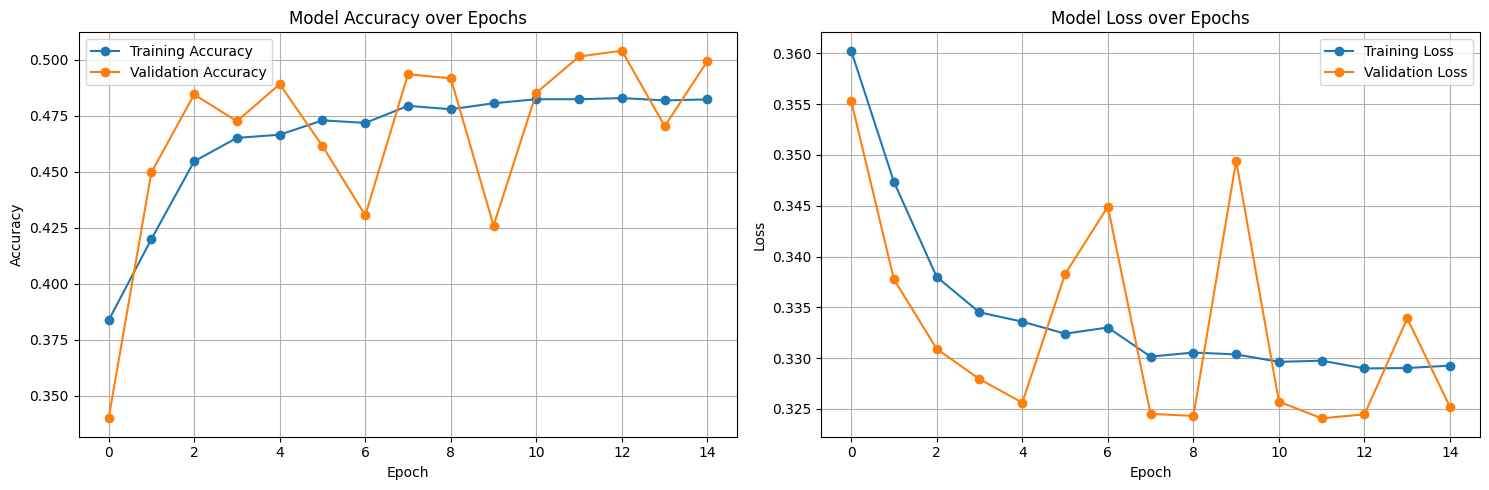

Best validation accuracy: 0.5041
Best validation loss: 0.3241

Generating validation set predictions...
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step

Finding optimal thresholds for each emotion:
anger: 0.211
disgust: 0.026
fear: 0.021
joy: 0.361
sadness: 0.057
surprise: 0.126
neutral: 0.307

Generating test set predictions...
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step

Classification Report (with optimal thresholds):
              precision    recall  f1-score   support

       anger       0.23      0.57      0.33       726
     disgust       0.00      0.00      0.00       123
        fear       0.02      0.44      0.04        98
         joy       0.68      0.67      0.68      2104
     sadness       0.08      0.93      0.14       379
    surprise       0.15      0.74      0.25       677
     neutral       0.41      0.83      0.55      1787

   micro avg       0.24      0.71      0.36      5894
   macro avg       0.22      0.60      0.28      5894
weighted avg       0.42      0.71      0.

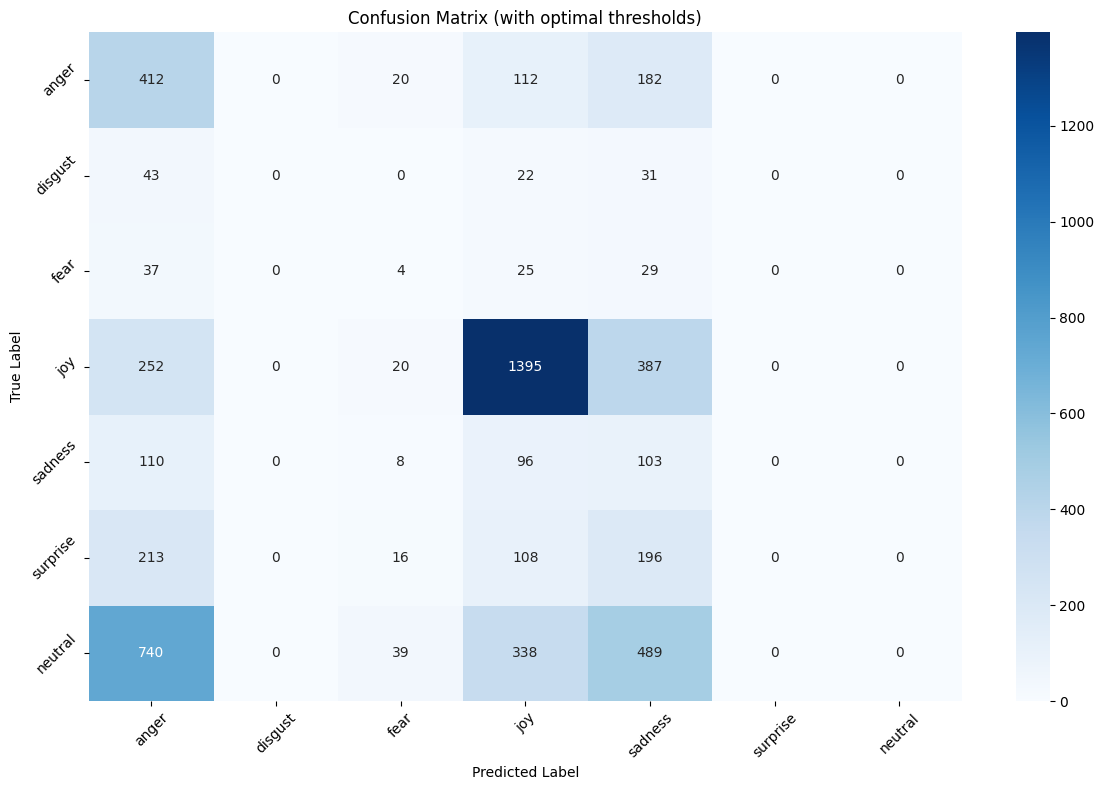


Per-class Performance Metrics (with optimal thresholds):
   Category  Optimal Threshold  Precision  Recall  F1-Score  Support
0     anger             0.2114     0.2280  0.5675    0.3253    726.0
1   disgust             0.0262     0.0000  0.0000    0.0000    123.0
2      fear             0.0208     0.0225  0.4388    0.0427     98.0
3       joy             0.3610     0.6770  0.6744    0.6757   2104.0
4   sadness             0.0566     0.0762  0.9314    0.1409    379.0
5  surprise             0.1255     0.1521  0.7356    0.2520    677.0
6   neutral             0.3073     0.4125  0.8310    0.5513   1787.0


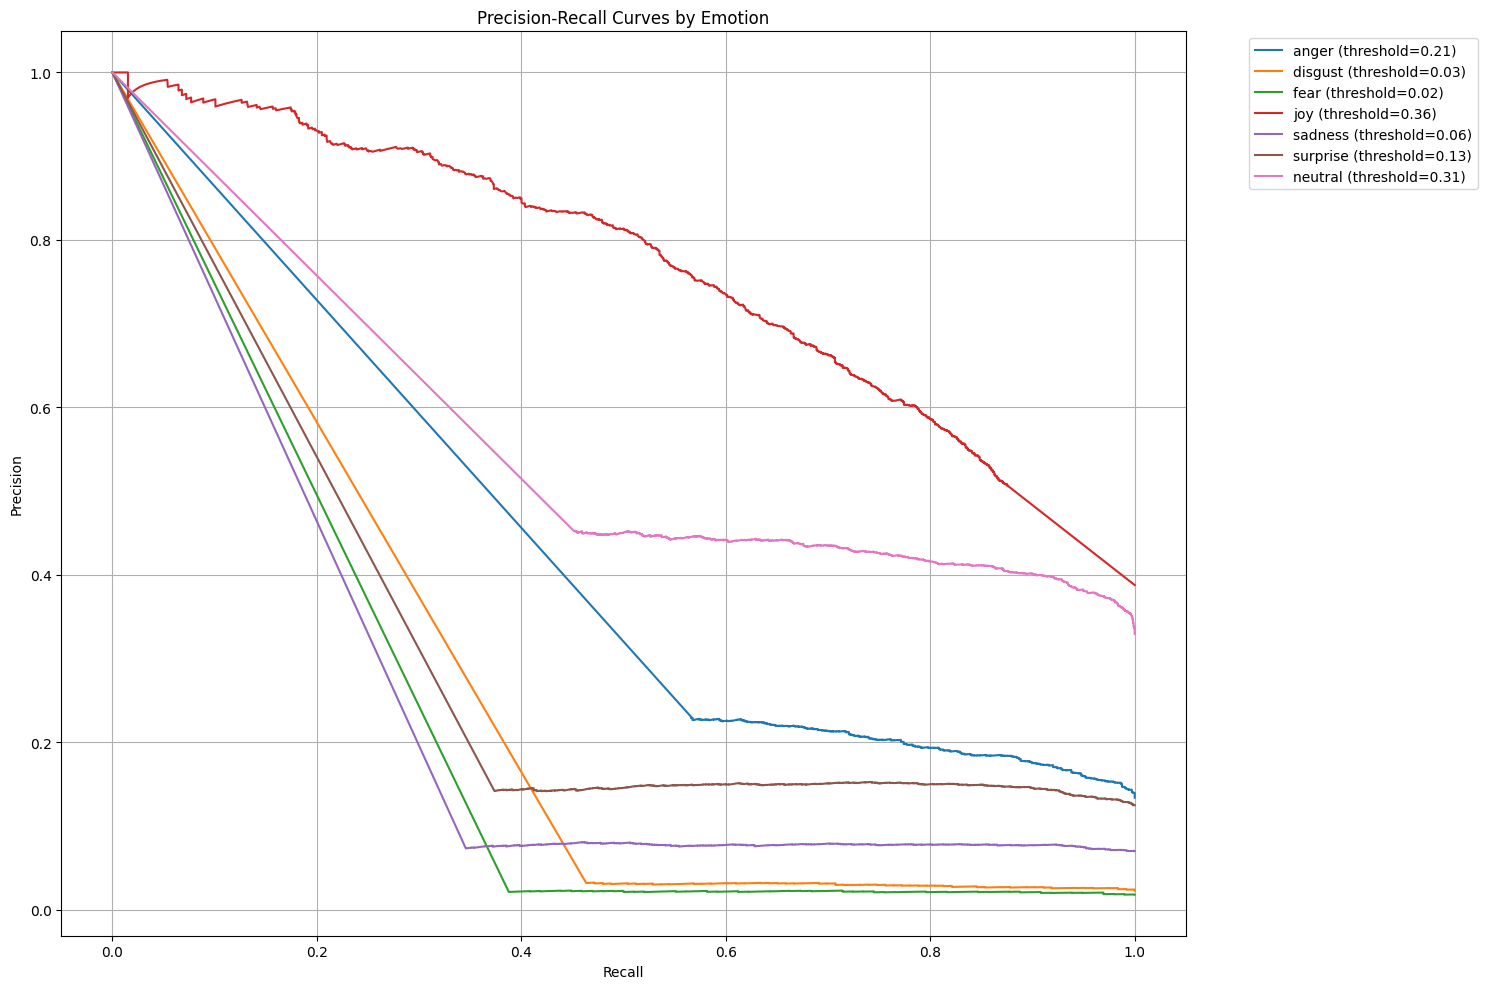


Comparison of F1-scores (Fixed vs Optimal Thresholds):
   Category  Fixed Threshold F1  Optimal Threshold F1  Improvement (%)
0     anger              0.0000                0.3253              inf
1   disgust              0.0000                0.0000              inf
2      fear              0.0000                0.0427              inf
3       joy              0.6332                0.6757           6.7093
4   sadness              0.0000                0.1409              inf
5  surprise              0.0000                0.2520              inf
6   neutral              0.0000                0.5513              inf


In [43]:
# Plotting Training History
plt.figure(figsize=(15, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', label='Training Loss')
plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Printing best accuracy and loss values
best_val_acc = max(history.history['val_accuracy'])
best_val_loss = min(history.history['val_loss'])
print(f"Best validation accuracy: {best_val_acc:.4f}")
print(f"Best validation loss: {best_val_loss:.4f}")

# Generating Validation Predictions for Threshold Optimization
print("\nGenerating validation set predictions...")
val_predictions = model.predict(
    {
        'input_ids': valid_encodings['input_ids'],
        'attention_mask': valid_encodings['attention_mask']
    }
)

# Optimal threshold for each class
def find_optimal_threshold(y_true, y_pred):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    f1_scores = np.nan_to_num(f1_scores)
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    return optimal_threshold

# Optimal threshold for each emotion
optimal_thresholds = []
print("\nFinding optimal thresholds for each emotion:")
for i, category in enumerate(ekman_categories):
    threshold = find_optimal_threshold(valid_labels[:, i], val_predictions[:, i])
    optimal_thresholds.append(threshold)
    print(f"{category}: {threshold:.3f}")

# Generating and Processing Test Set Predictions
print("\nGenerating test set predictions...")
test_predictions = model.predict(
    {
        'input_ids': test_encodings['input_ids'],
        'attention_mask': test_encodings['attention_mask']
    }
)

# Converting predictions to binary using optimal thresholds
test_predictions_binary = np.zeros_like(test_predictions)
for i in range(len(ekman_categories)):
    test_predictions_binary[:, i] = (test_predictions[:, i] > optimal_thresholds[i]).astype(int)

# Printing Classification Report
print("\nClassification Report (with optimal thresholds):")
print(classification_report(test_labels, test_predictions_binary,
                          target_names=ekman_categories))

# Creating and Ploting Confusion Matrix
plt.figure(figsize=(12, 8))
confusion = confusion_matrix(test_labels.argmax(axis=1),
                           test_predictions_binary.argmax(axis=1))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=ekman_categories,
            yticklabels=ekman_categories)
plt.title('Confusion Matrix (with optimal thresholds)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculating Per-Class Metrics
class_metrics = []
for i, category in enumerate(ekman_categories):
    true_positives = ((test_labels[:, i] == 1) & (test_predictions_binary[:, i] == 1)).sum()
    false_positives = ((test_labels[:, i] == 0) & (test_predictions_binary[:, i] == 1)).sum()
    false_negatives = ((test_labels[:, i] == 1) & (test_predictions_binary[:, i] == 0)).sum()

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    class_metrics.append({
        'Category': category,
        'Optimal Threshold': optimal_thresholds[i],
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Support': test_labels[:, i].sum()
    })

# Displaying metrics DataFrame
metrics_df = pd.DataFrame(class_metrics)
print("\nPer-class Performance Metrics (with optimal thresholds):")
print(metrics_df.round(4))

# Ploting Precision-Recall Curves
plt.figure(figsize=(15, 10))
for i, category in enumerate(ekman_categories):
    precision, recall, _ = precision_recall_curve(test_labels[:, i], test_predictions[:, i])
    plt.plot(recall, precision, label=f'{category} (threshold={optimal_thresholds[i]:.2f})')

plt.title('Precision-Recall Curves by Emotion')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compare Fixed vs Optimal Thresholds
fixed_predictions = (test_predictions > 0.5).astype(int)
print("\nComparison of F1-scores (Fixed vs Optimal Thresholds):")
comparison_data = []
for i, category in enumerate(ekman_categories):
    fixed_f1 = f1_score(test_labels[:, i], fixed_predictions[:, i])
    optimal_f1 = f1_score(test_labels[:, i], test_predictions_binary[:, i])
    improvement = ((optimal_f1 - fixed_f1) / fixed_f1 * 100) if fixed_f1 > 0 else float('inf')

    comparison_data.append({
        'Category': category,
        'Fixed Threshold F1': fixed_f1,
        'Optimal Threshold F1': optimal_f1,
        'Improvement (%)': improvement
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4))

# Saving Results
metrics_df.to_csv('emotion_classification_metrics.csv', index=False)
comparison_df.to_csv('threshold_comparison_metrics.csv', index=False)

---

**By:** Mohamed Yehia Mokhtar Salama

---